<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic5/Chollet_HFST5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

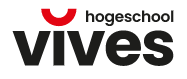<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# Effect van learning rate

Zie handboek §5.3.1

In [ ]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [ ]:
((train_images, train_labels), _) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
result = model.fit(train_images, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3672 - accuracy: 0.9096 - val_loss: 0.1629 - val_accuracy: 0.9587
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1398 - accuracy: 0.9636 - val_loss: 0.1923 - val_accuracy: 0.9585
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1117 - accuracy: 0.9729 - val_loss: 0.1827 - val_accuracy: 0.9638
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1013 - accuracy: 0.9784 - val_loss: 0.1893 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0932 - accuracy: 0.9805 - val_loss: 0.1941 - val_accuracy: 0.9700
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0756 - accuracy: 0.9852 - val_loss: 0.2232 - val_accuracy: 0.9722
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0700 - accuracy: 0.9861 - val_loss: 0.2334 - val_accuracy: 0.9725

In [ ]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
result_large = model.fit(train_images, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 769.0225 - accuracy: 0.3929 - val_loss: 2.5189 - val_accuracy: 0.2945
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 4.8038 - accuracy: 0.2635 - val_loss: 2.1436 - val_accuracy: 0.2377
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 3.0382 - accuracy: 0.2340 - val_loss: 2.1477 - val_accuracy: 0.2242
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 3.3278 - accuracy: 0.2728 - val_loss: 1.9538 - val_accuracy: 0.2869
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 3.0769 - accuracy: 0.2907 - val_loss: 2.1824 - val_accuracy: 0.2862
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8366 - accuracy: 0.2970 - val_loss: 2.6325 - val_accuracy: 0.3062
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4453 - accuracy: 0.2585 - val_loss: 2.0001 - val_accuracy: 0.26

In [ ]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-5),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
result_small = model.fit(train_images, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 1.8991 - accuracy: 0.4989 - val_loss: 1.5191 - val_accuracy: 0.7700
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 1.2652 - accuracy: 0.7949 - val_loss: 0.9979 - val_accuracy: 0.8407
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.8730 - accuracy: 0.8369 - val_loss: 0.7098 - val_accuracy: 0.8651
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.6632 - accuracy: 0.8587 - val_loss: 0.5604 - val_accuracy: 0.8783
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.5491 - accuracy: 0.8734 - val_loss: 0.4774 - val_accuracy: 0.8879
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4813 - accuracy: 0.8832 - val_loss: 0.4262 - val_accuracy: 0.8981
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4370 - accuracy: 0.8900 - val_loss: 0.3917 - val_accuracy: 0.9033

In [ ]:
loss = result.history['loss']
loss_large = result_large.history['loss']
loss_small = result_small.history['loss']

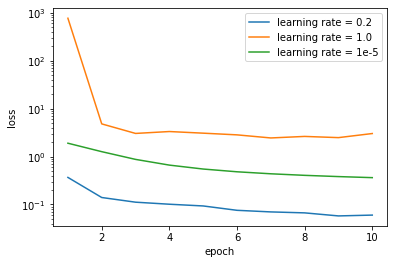

In [ ]:
import matplotlib.pyplot as plt

plt.semilogy(range(1,11), loss)
plt.semilogy(range(1,11), loss_large)
plt.semilogy(range(1,11), loss_small)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(labels=['learning rate = 0.2', 'learning rate = 1.0', 'learning rate = 1e-5']);